# Topcat Python Interface

In [1]:
from topcat import *
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
%matplotlib inline

In [2]:
def circlepoint(r):
    alpha = 2 * math.pi * random.random()
    return [r * math.cos(alpha), r * math.sin(alpha)]

def circle(r, n_points):
    return np.asarray([circlepoint(r) for _ in range(n_points)])

def noisy_circle(r, n_points, noise_level):
    circle_points = circle(r, n_points)
    return np.asarray(map(lambda x : x+noise_level*(np.random.random(x.shape)-0.5), circle_points))

def sphere(r, n_points):
    points = map(lambda x: np.asarray([random.random()-0.5, random.random()-0.5, random.random()-0.5]), [i for i in range(n_points)])
    return np.asarray(map(lambda x: r*x/np.linalg.norm(x), points))

def square(r, n_points):
    return map(lambda x: 2*r*np.asarray([random.random()-0.5, random.random()-0.5]), [i for i in range(n_points)])
    

In [10]:
#Data set
points = noisy_circle(1, 100, 1)
#points = sphere(1, 500)

distances = ["euclidean_codensity"] #yields a bifiltration with euclidean distance and codensity

#Filtration values
filtrationValues = [[0.0, 0.05, 0.1, 0.15, 0.2, 0.3,0.4, 0.5, 0.9], [-100.0, -50.0, -40.0, -30.0, -20.0, -15.0, -10.0, -1.0, 0.0]]

In [11]:
#Compute the persistence modules
persistencemodules = persistenceModules(points, distances, np.asarray(filtrationValues), 2)
for p in persistencemodules:
    print p

19:19:23.258 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Starting to compute simplicial complex...
19:19:23.266 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Finished computing simplicial complex. (Computed 8016 number of simplices.)
19:19:23.266 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Starting to compute filtrationValues for each simplex...
19:19:23.274 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Finished computing filtrationValues.
19:19:23.274 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Starting to compute homology functors...
19:19:23.274 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Starting to compute chain functor dimensions...
19:19:23.288 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Finished to computing chain functor dimensions.
19:19:23.288 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Starting to compute basis change in each position...
19:19:23.289 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Invariant 

19:19:23.399 [pool-3-thread-6] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 7, 3 ]
19:19:23.405 [pool-3-thread-7] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 6, 8 ]
19:19:23.405 [pool-3-thread-5] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 6, 7 ]
19:19:23.406 [pool-3-thread-2] DEBUG t.p.homology.HomologyWorker - Starting basis change computation of position: [ 7, 6 ]
19:19:23.406 [pool-3-thread-2] DEBUG t.p.homology.HomologyWorker - Number of simplices of dim 0: 100
19:19:23.406 [pool-3-thread-2] DEBUG t.p.homology.HomologyWorker - Number of simplices of dim 1: 391
19:19:23.406 [pool-3-thread-2] DEBUG t.p.homology.HomologyWorker - Number of simplices of dim 2: 659
19:19:23.406 [pool-3-thread-8] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 7, 4 ]
19:19:23.407 [pool-3-thread-3] DEBUG t.p.homology.HomologyWorker - Starting basis 

In [12]:
#Compute the betti-0 table (dimension table) of the 0th and 1st persistence modules

def bettiTable(P, n):
    resolution = P.module.getFunctor().projectiveResolution()
    gens = resolution[n].betti0()
    D = np.zeros((11, 11))
    for g in gens:
        D[10-g.get(0), g.get(1)] += 1
    return D

print("The generators of the 0th persistence module")
print bettiTable(persistencemodules[0], 0)

print("The first syzygy module of the 0th persistence module")
print bettiTable(persistencemodules[0], 1)

print("The generators of the 1st persistence module")
print bettiTable(persistencemodules[1], 0)

print("The first syzygy module of the 1st persistence module")
print bettiTable(persistencemodules[1], 1)

The generators of the 0th persistence module
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
The first syzygy module of the 0th persistence module
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 59. 12.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 29.  9.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 14. 18.  9.  8.  0.  0.  0.]
 [ 0.  0.  0.  0.  6. 11. 2

In [13]:
#Computes a slice of the rank invariant

def rankInv(P, direction):
    D = np.zeros((11, 11))
    for i, j in zip(range(11), range(11)):
        D[10-i, j] = P.rank([i, j], [i+direction[0], j+direction[1]])
    print D

rankInv(persistencemodules[0], [2, 1])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 34.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 76.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 94.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 99.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [99.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


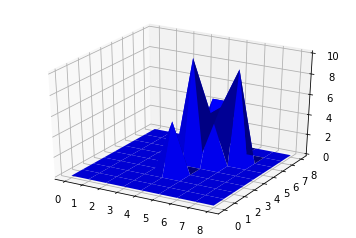

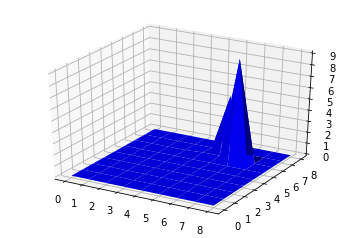

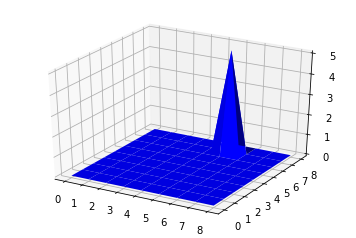

In [22]:
#Persistence landscapes
landscapes = list(persistencemodules[1].module.persistenceLandscape(2).vectorize())

for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Make data
    X = np.arange(0, len(filtrationValues[0]), 1)
    Y = np.arange(0, len(filtrationValues[1]), 1)
    x, y = np.meshgrid(X, Y)
    z = np.asarray(list(landscapes[i])).reshape((len(filtrationValues[0]), len(filtrationValues[1])))

    # Plot the surface
    ax.plot_surface(x, y, z, color='b')

In [59]:
#Stable rank example with standard contour
stablerank = stableRank(points, distances, np.asarray(filtrationValues), 2)
for sr in stablerank:
    plt.figure()
    plt.plot(sr[0], sr[1])

19:06:55.131 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Starting to compute simplicial complex...
19:06:55.137 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Finished computing simplicial complex. (Computed 12600 number of simplices.)
19:06:55.137 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Starting to compute filtrationValues for each simplex...
19:06:55.142 [Thread-1] DEBUG t.p.simplex.SimplicialComplex - Finished computing filtrationValues.
19:06:55.142 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Starting to compute homology functors...
19:06:55.142 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Starting to compute chain functor dimensions...
19:06:55.197 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Finished to computing chain functor dimensions.
19:06:55.197 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Starting to compute basis change in each position...
19:06:55.197 [pool-11-thread-1] DEBUG t.p.homology.HomologyWorker - Starting 

19:06:55.396 [Thread-1] DEBUG t.persistence.homology.HomologyUtil - Invariant index: [ 7, 0 ]
19:06:55.419 [pool-11-thread-5] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 5, 3 ]
19:06:55.419 [pool-11-thread-5] DEBUG t.p.homology.HomologyWorker - Starting basis change computation of position: [ 6, 6 ]
19:06:55.419 [pool-11-thread-5] DEBUG t.p.homology.HomologyWorker - Number of simplices of dim 0: 100
19:06:55.419 [pool-11-thread-5] DEBUG t.p.homology.HomologyWorker - Number of simplices of dim 1: 1391
19:06:55.419 [pool-11-thread-5] DEBUG t.p.homology.HomologyWorker - Number of simplices of dim 2: 9632
19:06:55.430 [pool-11-thread-1] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 6, 2 ]
19:06:55.431 [pool-11-thread-1] DEBUG t.p.homology.HomologyWorker - Starting basis change computation of position: [ 6, 7 ]
19:06:55.431 [pool-11-thread-1] DEBUG t.p.homology.HomologyWorker - Number of simplices of dim 0: 100


19:06:55.828 [pool-11-thread-8] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 7, 5 ]
19:06:55.844 [pool-11-thread-3] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 7, 6 ]
19:06:55.863 [pool-11-thread-7] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 7, 8 ]
19:06:55.880 [pool-11-thread-6] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 8, 3 ]
19:06:55.900 [pool-11-thread-2] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 7, 7 ]
19:06:55.981 [pool-11-thread-1] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 8, 4 ]
19:06:56.006 [pool-11-thread-10] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 8, 5 ]
19:06:56.039 [pool-11-thread-5] DEBUG t.p.homology.HomologyWorker - Finished basis change computation of position: [ 8, 8 ]
19:06:5

KeyboardInterrupt: 

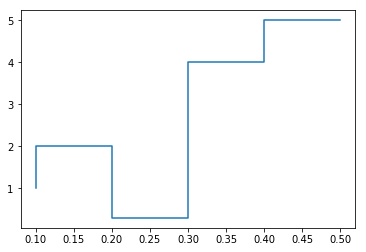

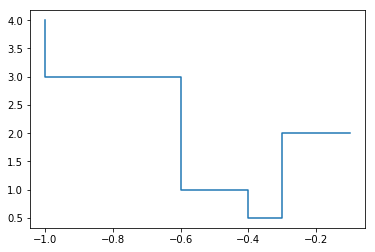

In [11]:
#Define a custom step contour
persistenceContour = [[[1.0, 2.0, 0.3, 4.0, 5.0], [0.1, 0.2, 0.3, 0.4, 0.5]], [[4.0, 3.0, 1.0, 0.5, 2.0], [-1.0, -0.6, -0.4, -0.3, -0.1]]]
for contour in persistenceContour:
    plt.figure()
    plt.step(contour[1], contour[0])

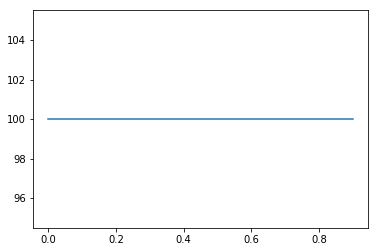

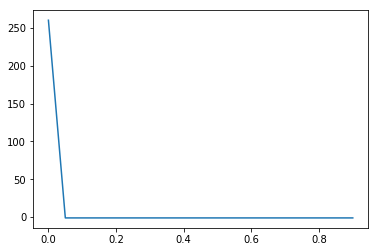

In [12]:
#Stable rank example with custom step contour
stablerank = stableRank(points, distances, np.asarray(filtrationValues), 2, persistenceContour)
for sr in stablerank:
    plt.figure()
    plt.plot(sr[0], sr[1])

In [16]:
#You can also define your own distances and pass the distance matrices to Topcat. But transferring
#the data from python to java might take time.

points = circle(1, 100)

#Distance matrices
distanceMatrix1 = squareform(pdist(points, 'euclidean'))
distanceMatrix2 = squareform(pdist(points, 'cosine'))

filtrationValues = [[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3,0.4, 0.5], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15]]

In [17]:
persistencemodules = persistenceModules_dist(np.asarray([distanceMatrix1, distanceMatrix2]), np.asarray(filtrationValues), 2)
for p in persistencemodules:
    print p

[ 0, 0 ]:
0:[ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

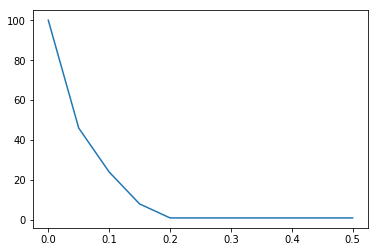

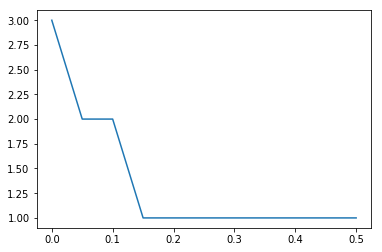

In [18]:
stablerank = stableRank_dist(np.asarray([distanceMatrix1, distanceMatrix2]), np.asarray(filtrationValues), 2)
for sr in stablerank:
    plt.figure()
    plt.plot(sr[0], sr[1])